<a href="https://colab.research.google.com/github/kevinCortial/graphlearning/blob/main/harvard/processing_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Harvard data pre-processing for graph learning </center></h1>

<center> Kévin CORTIAL et Taoufik JARMOUNI &nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp; Open Studio UCA IP / Atlas des Synergies Productives &nbsp;&nbsp;&nbsp; </center>

---

**Needed packages installation :**

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

**CSV file importation (Github):**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Harvard/data/hs92_proximities.csv'

original_df = pd.read_csv(url)

#print(original_df)

**Graph generation using the HS92 proximities Harvard data:**

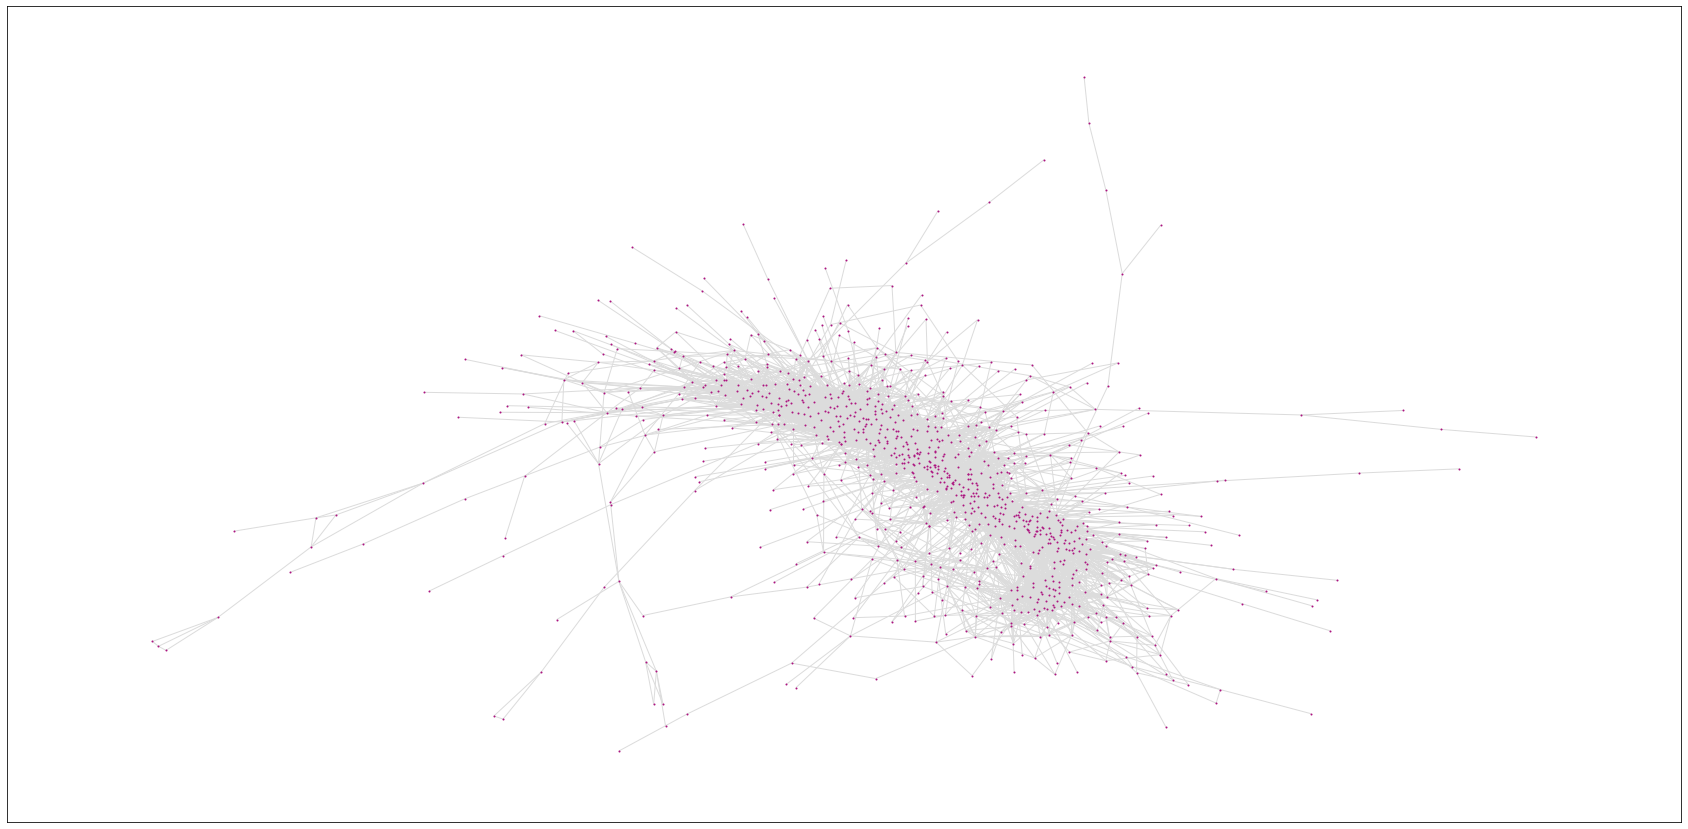

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def get_graph_from_dataframe(dataframe):
  # We only need the three needed columns
  dataframe = dataframe[["commoditycode_1", "commoditycode_2", "proximity"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe into an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  return dataframe


def get_clean_graph_from_dataframe(dataframe):
  G = nx.from_pandas_adjacency(dataframe)
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.1]
  G.remove_nodes_from(list_attached_nodes)
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro')
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G


final_df = get_graph_from_dataframe(original_df)
G = get_clean_graph_from_dataframe(final_df)

---

**JSON file importation (Github):**

In [ ]:
import json
from urllib.request import urlopen

url = 'https://raw.githubusercontent.com/kevinCortial/graphlearning/main/Harvard/data/network_hs92_4digit.json'

response = urlopen(url)
# storing the JSON response 
# from url in data
data_json = json.loads(response.read())
# print the json response
#print(data_json)

**Graph generation using the network HS92 Harvard data:**

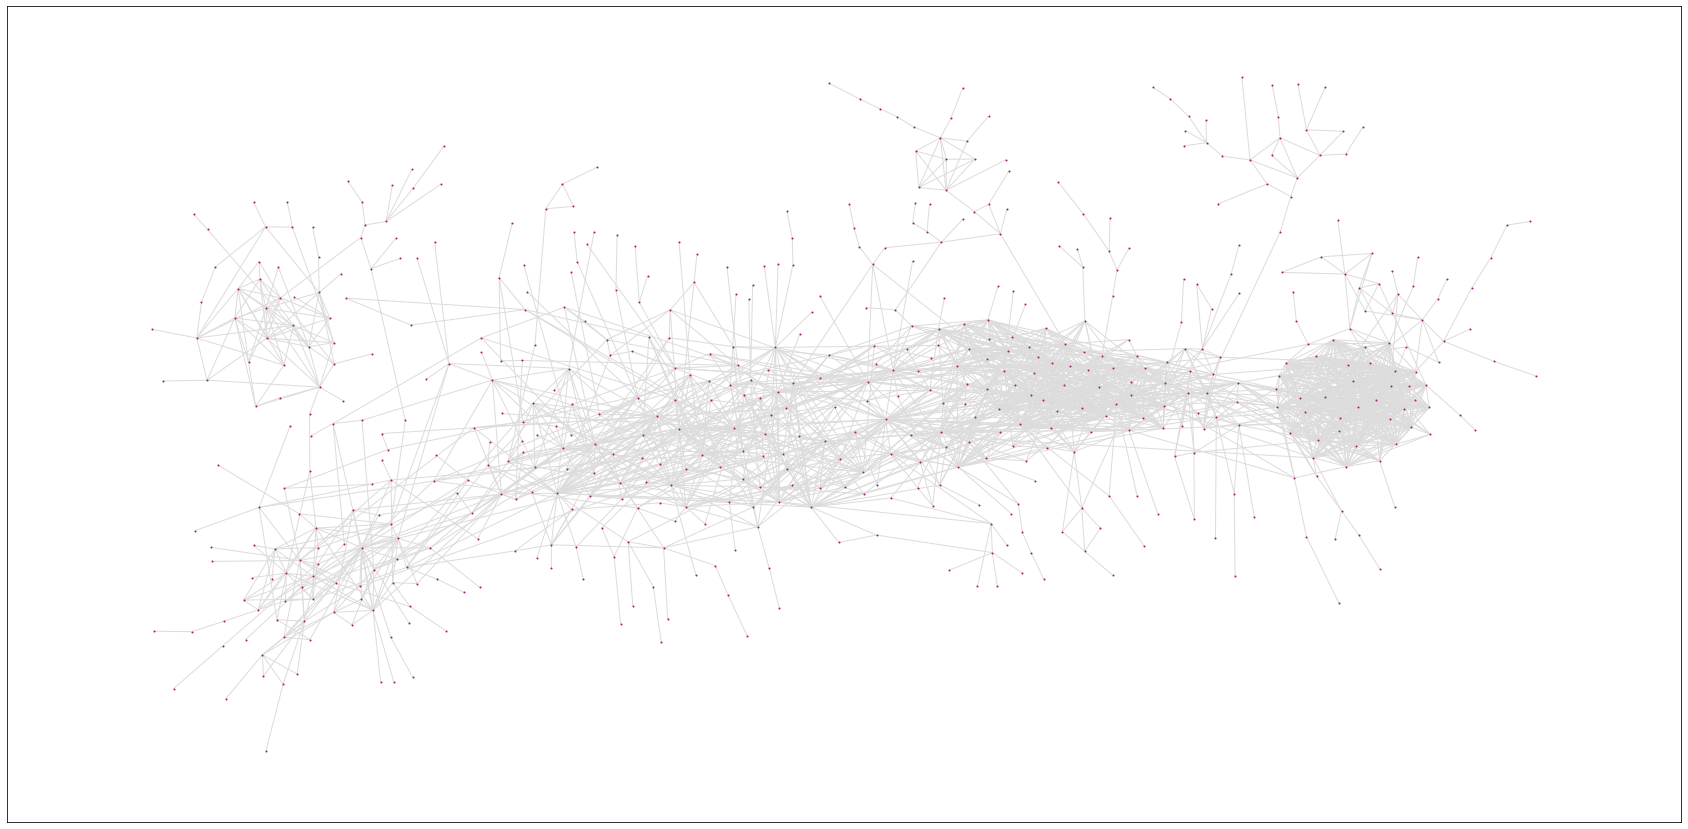

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# PART TWO, other dataframe (positions):
def get_graph_from_dataframe_hs(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  #nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  return dataframe

def get_graph_from_dataframe_hs_no_pos(dataframe, pos):
  # We only need the three needed columns
  dataframe = dataframe[["source", "target", "strength"]]
  dataframe.columns = ['source', 'dest', 'coef']
  # We delete every line that has a weight of zero
  data_no_zero = dataframe[dataframe['coef'] >= 0.5]
  dataframe = pd.crosstab(data_no_zero.source, data_no_zero.dest, dropna=False)
  # At this point we can transform the dataframe intro an adjacency matrix
  idx = dataframe.columns.union(dataframe.index)
  dataframe = dataframe.reindex(index = idx, columns=idx, fill_value=0)
  G = nx.from_pandas_adjacency(dataframe, create_using = nx.DiGraph())
  plt.figure(figsize=(30, 15))
  nx.set_node_attributes(G, pos, 'coord')
  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=1, node_color='#ac1480', edge_color='gainsboro')
  plt.show()
  return dataframe

def get_clean_graph_from_dataframe_hs(dataframe, pos):
  G = nx.from_pandas_adjacency(dataframe)
  
  centrality = nx.closeness_centrality(G)
  centrality_sort = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1])}
  list_attached_nodes = [key for key, value in centrality_sort.items() if value < 0.06]

  
  G.remove_nodes_from(list_attached_nodes)

  nx.draw_networkx(G, node_size=1, with_labels=False, arrowsize=0.1, node_color='#ac1480', edge_color='gainsboro', pos = pos)
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return G

# First file.json that contains two dataframes, one with nodes infos and the other with the edges
df_nodes = pd.DataFrame(data_json['nodes'])
df_edges = pd.DataFrame(data_json['edges'])

# Dictionary of tuples that contains the positions (x, y) of every node
pos = df_nodes.set_index('id').apply(tuple, 1).groupby(level=0).agg(lambda x: x.values).to_dict()

original_df_positions = df_edges

df_positions = get_graph_from_dataframe_hs(original_df_positions, pos)
#df_no_positions = get_graph_from_dataframe_hs_no_pos(original_df_positions, pos)

G_positions = get_clean_graph_from_dataframe_hs(df_positions, pos)
#G_no_positions = get_clean_graph_from_dataframe_hs_no_pos(df_no_positions)

---

**Louvain partition of the original (previous) graph:**

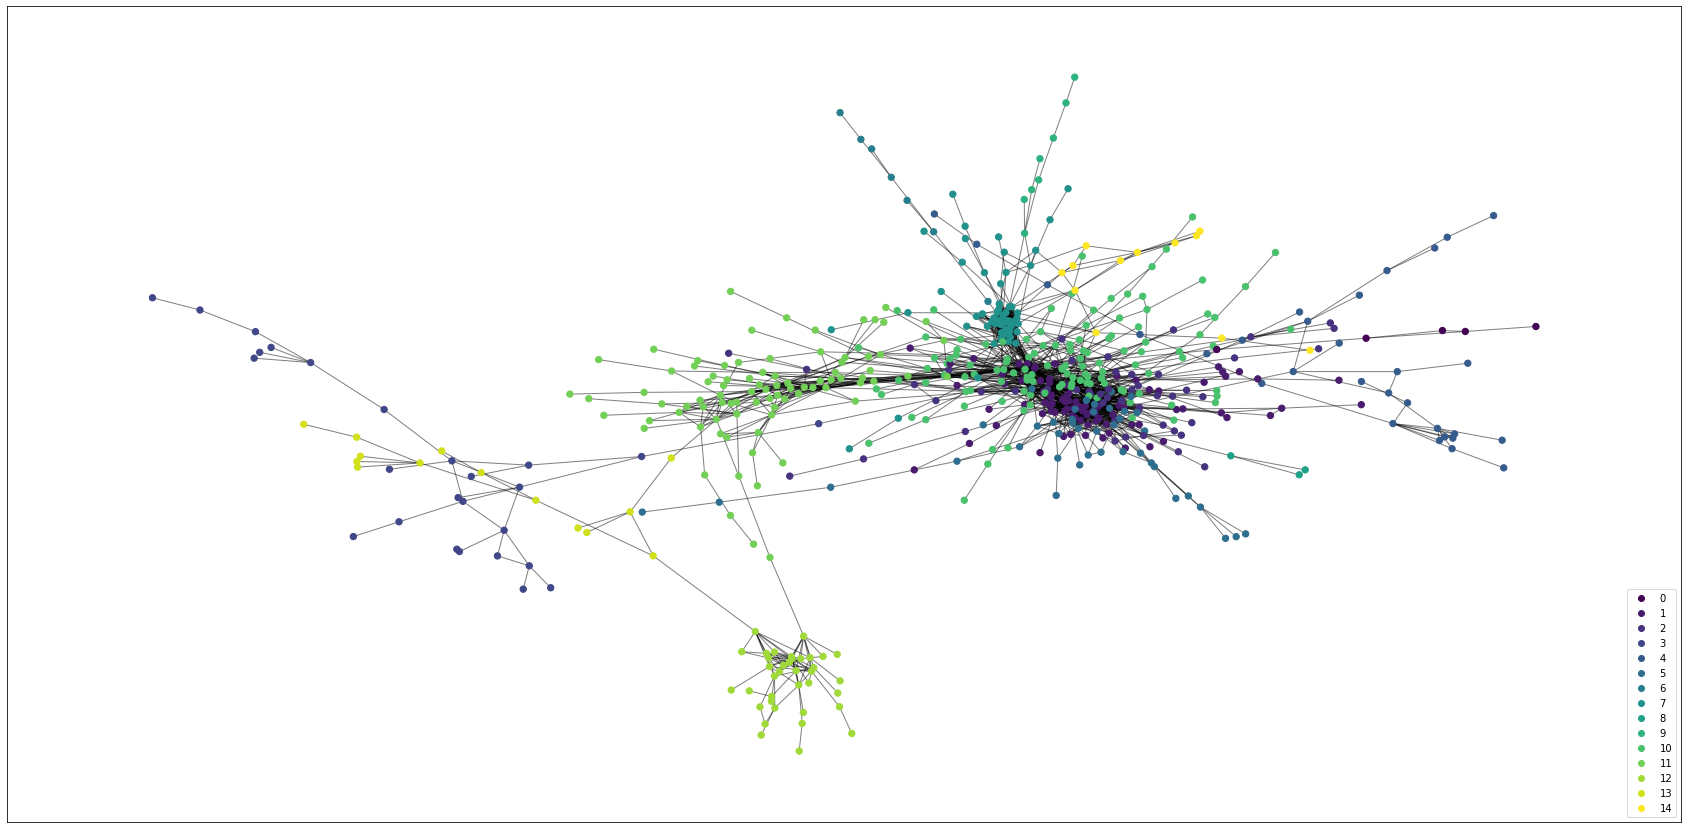

In [ ]:
from community import community_louvain

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def get_louvain_graph_from_G(G):
  # Louvain partition
  partition = community_louvain.best_partition(G)

  pos = nx.spring_layout(G)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
  nodes = nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
  nx.draw_networkx_edges(G, pos, alpha=0.5)

  # Legend creation
  values = sorted(list(set(partition.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')
  
  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return partition

partition = get_louvain_graph_from_G(G_positions)

**Leiden partition of the original graph:**

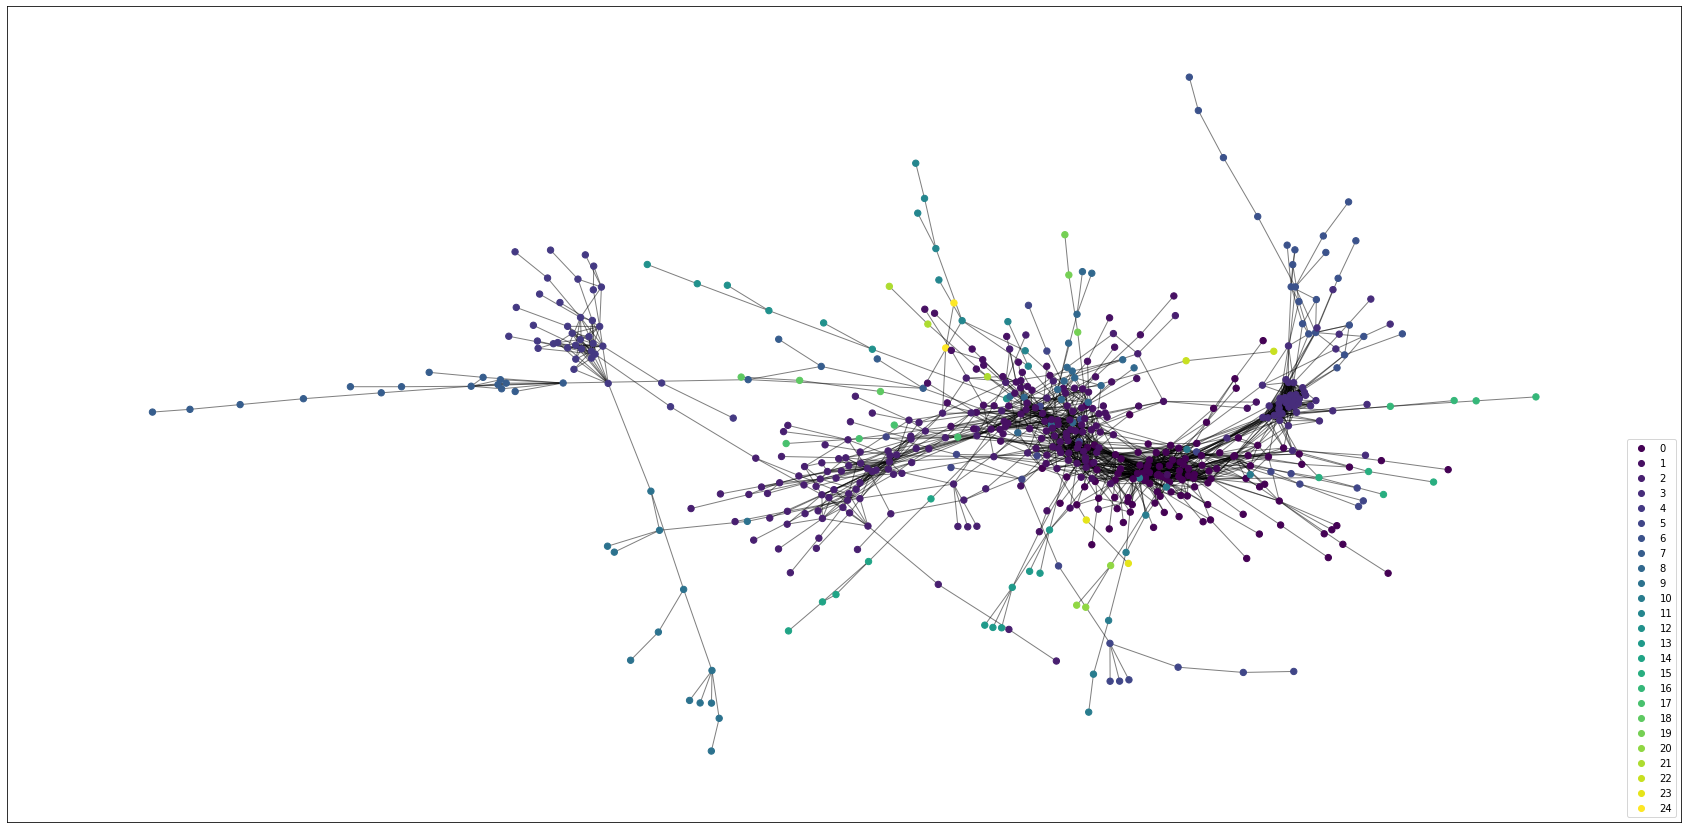

In [ ]:
from cdlib import algorithms

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import leidenalg
import igraph as ig
import random

def get_leiden_graph_from_G(G):
  # Leiden partition
  G2 = ig.Graph.from_networkx(G)
  randomlist = []
  for i in range(0,2103):
    n = random.randint(1,30)
    randomlist.append(n)

  # Fake data for the edges
  partition = leidenalg.find_partition(G2, leidenalg.ModularityVertexPartition, weights = randomlist);

  dict_part = dict()
  idx= 0
  for i in partition.membership:
    dict_part[idx] = i
    idx += 1


  A = G2.get_edgelist()
  #G3 = nx.DiGraph(A) # In case the graph is directed
  G3 = nx.Graph(A) # In case the graph is undirected
  pos = nx.spring_layout(G3)

  # Color the nodes according to their partition
  cmap = cm.get_cmap('viridis', max(dict_part.values()) + 1)
  nodes = nx.draw_networkx_nodes(G2, pos, dict_part.keys(), node_size=40,
                        cmap=cmap, node_color=list(dict_part.values()))
  nx.draw_networkx_edges(G3, pos, alpha=0.5)
  
  # Legend creation
  values = sorted(list(set(dict_part.values())))
  for v in values:
      # Make dummy scatterplot to generate labels
      plt.gca().scatter([],[], color=nodes.cmap(v/np.max(values)), label=v)
  plt.legend(loc='lower right')

  fig = plt.gcf()
  fig.set_size_inches(30, 15)
  plt.show()
  return dict_part, partition

dict_leiden, partition_leiden = get_leiden_graph_from_G(G_positions)

---

**Louvain metrics calculations:**

In [ ]:
from sklearn import metrics

label_louvain = list(partition.values())

# todo: find a better way to import the list (of categories from the product space) from the other google colab
activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
activity_sector = activity_sector[:586]

print(metrics.adjusted_rand_score(label_louvain, activity_sector))
print(metrics.rand_score(label_louvain, activity_sector))

print(metrics.adjusted_mutual_info_score(label_louvain, activity_sector))
print(metrics.homogeneity_score(label_louvain, activity_sector))
print(metrics.completeness_score(label_louvain, activity_sector))
print(metrics.v_measure_score(label_louvain, activity_sector))
print(metrics.fowlkes_mallows_score(label_louvain, activity_sector))

0.12224512256850564
0.8433826317785362
0.2548110440148186
0.32576486265910926
0.2932067664279781
0.308629531654004
0.20948826081486155


**Leiden metrics calculations:**

In [ ]:
from sklearn import metrics

label_leiden = partition_leiden.membership

activity_sector = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 19, 19, 19, 19, 19, 19, 19, 19, 19, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
activity_sector = activity_sector[:586]

print(metrics.adjusted_rand_score(label_leiden, activity_sector))
print(metrics.rand_score(label_leiden, activity_sector))

print(metrics.adjusted_mutual_info_score(label_leiden, activity_sector))
print(metrics.homogeneity_score(label_leiden, activity_sector))
print(metrics.completeness_score(label_leiden, activity_sector))
print(metrics.v_measure_score(label_leiden, activity_sector))
print(metrics.fowlkes_mallows_score(label_leiden, activity_sector))

0.12415130127645048
0.8399696624952597
0.26863692571420816
0.3538065997997338
0.33550106870035395
0.3444107697346298
0.2136097043836049


---

TEST ZONE:

In [ ]:
import json
from pandas.io.json import json_normalize
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# First file.json that contains two dataframes, one with nodes infos and the other with the edges
with open('/content/drive/MyDrive/ColabNotebooks/dynamic_productspace_FRA.json') as json_data:
    data = json.load(json_data)
df = pd.DataFrame(data)
#df = pd.DataFrame(data['edges'])
print(df)

                                                             0  \
index                                                        0   
edges        [[0, 0], [1, 1], [2, 2], [3, 3], [3, 4], [4, 4...   
weights      [1.0, 1.0, 1.0, 1.0, 0.5769230769230769, 1.0, ...   
y            [0.913859102640138, 0.6152713187616885, 0.6273...   
X            [[0.913859102640138], [0.6152713187616885], [0...   
...                                                        ...   
ict                                                        NaN   
financial                                                  NaN   
transport                                                  NaN   
travel                                                     NaN   
unspecified                                                NaN   

                                                             1  \
index                                                        1   
edges        [[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5...   
weights  